저번 파일에서는 이해를 돕기 위해 기존 파이썬 문법으로 최대한 많은 것을 적었습니다. <br> 이번에는 넘파이를 이용한 여러가지 테크닉을 이용해 저번에 진행했던 데이터 전처리를 할 거니까 구경해보세요. <br>
그리고 넘파이가 훨씬 빠르니까 나중에는 그거 쓰세요!!!! <br>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 데이터 전처리

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

# 훈련 세트, 테스트 세트 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, 
                                                                      stratify=fish_target, random_state=42)
# stratify 인자는 원소 비율에 맞게 배열을 나누어줍니다!

> 데이터 정규화

정규화된 값은 원래 값에서 평균을 빼고, 표준편차를 나누어 구합니다. <br>
이를 통해 데이터의 크기에 의한 격차를 없앨 수 있습니다.

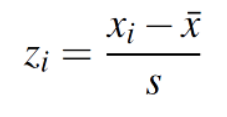

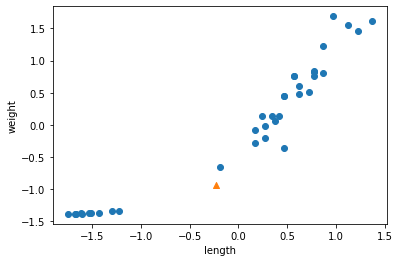

In [5]:
# 설마 평균과 표준편차를 직접 구하려고 하진 않겠죠?
# 넘파이 함수를 이용하면 훨씬 편합니다.
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

# 25, 150 데이터도 같이 정규화해줍니다.
new = ([25, 150] - mean) / std

# 잘 되었는지 확인해봅시다.
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[1.]


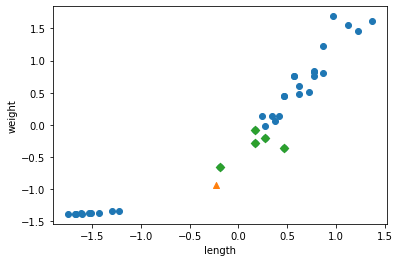

In [8]:
# 나머지는 전부 같습니다.
kn = KNeighborsClassifier()

kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)
print(kn.predict([new]))

# 가까운 5개를 출력해볼까요?
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
# 다시 판별을 잘 할수 있게 되었네요 ㅠㅠ
x = kn.predict([new])

print("도미") if x==1 else print("빙어")

도미
